In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

#### Question 1:
Assume we have a Poisson random process in which we expect 2.5 arrivals per second. Generate 100,000 random numbers reflecting the number of random arrivals in one second. Plot the histogram and determine how closely the numbers match what you would expect.

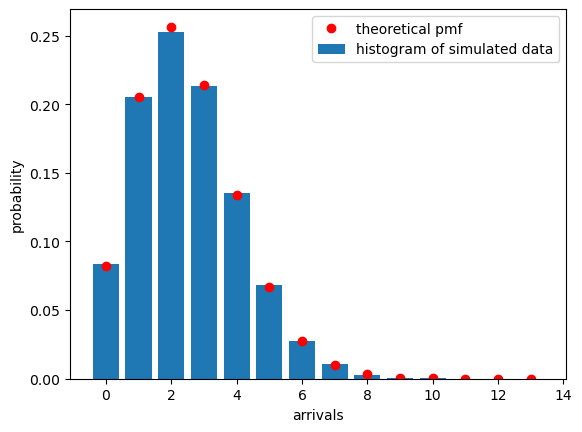

In [2]:
lam = 2.5
t   = 1
mu  = lam * t
x   = stats.poisson(mu).rvs(100000)

x_unique , cnts = np.unique(x , return_counts=True)

plt.bar(  x_unique , cnts / cnts.sum()                     , label='histogram of simulated data')
plt.plot( x_unique , stats.poisson(mu).pmf(x_unique) , 'ro', label='theoretical pmf')

plt.xlabel('arrivals')
plt.ylabel('probability')
plt.legend()
plt.show()

#### Question 2:
Assume we have a Poisson random process in which we expect 5 arrivals per hour. Generate 100,000 random numbers reflecting the number of random arrivals in one minute. Plot the histogram and determine how closely the numbers match what you would expect. Also plot the histogram of the time between arrivals. Does that match what you expect?

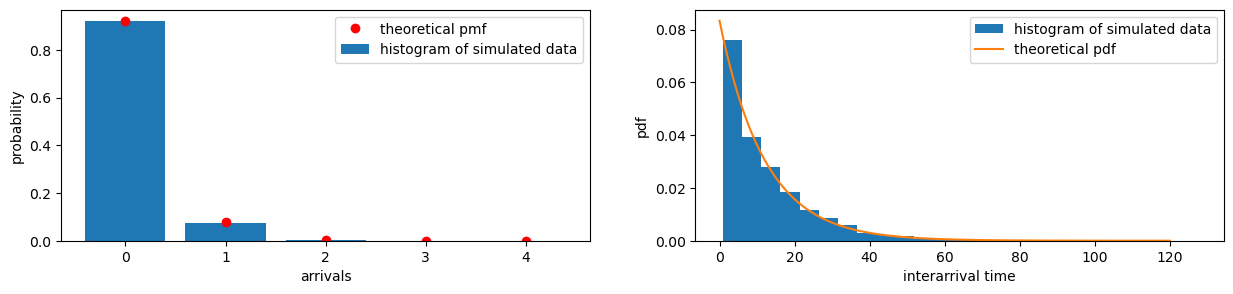

In [3]:
lam = 5/60
t   = 1
mu  = lam * t
x = stats.poisson(mu).rvs(100000)

x_unique , cnts = np.unique(x , return_counts=True)

inter_arrival_time = np.diff( np.where(x>0) )

f,a = plt.subplots( 1, 2 , figsize=(15,3) )

# arrivals per time window should have a poisson distribution
a[0].bar(  x_unique , cnts / cnts.sum()                     , label='histogram of simulated data')
a[0].plot( x_unique , stats.poisson(mu).pmf(x_unique) , 'ro', label='theoretical pmf')

# time between arrivals should have an exponential distribution
a[1].hist(inter_arrival_time.T , density=True , bins=25     , label='histogram of simulated data')
iat = np.linspace(0,120,num=500)
a[1].plot( iat , stats.expon(scale=1/lam).pdf(iat)          , label='theoretical pdf')

a[0].set_xlabel('arrivals')         , a[1].set_xlabel('interarrival time')
a[0].set_ylabel('probability')      , a[1].set_ylabel('pdf')
a[0].legend()                       , a[1].legend()

plt.show()

#### Question 3:
Assume you have a prior belief that the value of lambda in a Poisson process is uniformly distributed between 5 and 10 arrivals per minute. You then observe the process and count 7 arrivals in the first minute and 9 in the second minute. Use Bayes theorem to determine the posterior distribution of values of lambda.

$$pdf(\lambda | \textrm{observation}) = \frac{pr(observation | \lambda) \times \textrm{prior for} \lambda}{\textrm{constant}}$$

$$ = \frac{\lambda^7e^{-\lambda}}{7!}\cdot\frac{\lambda^9e^{-\lambda}}{9!}\times\ \frac{\textrm{constant prior} }{\textrm{constant}}$$

$$ \propto \lambda^{16}e^{-2\lambda}$$

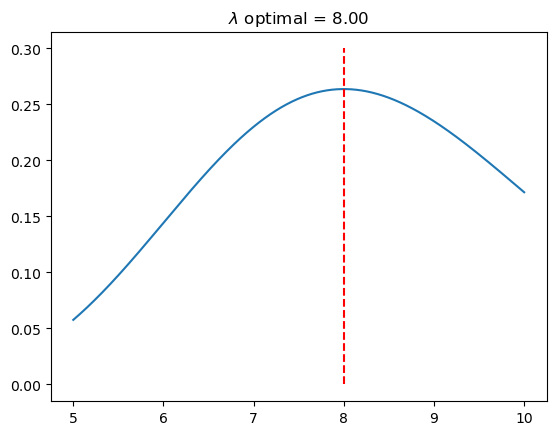

In [4]:
lam = np.linspace(5,10,num=1000)
dlam = lam[1]-lam[0]

pdf = lam**16 * np.exp(-2*lam)
normalization_factor = (pdf.sum() * dlam)

plt.plot(lam,pdf/normalization_factor)

lam_optimal = lam[np.argmax(pdf)]

plt.vlines(lam_optimal,color='red',linestyle='--',ymin=0,ymax=0.30)
plt.title('$\lambda$ optimal = ' + f"{lam_optimal:0.2f}")
plt.show()

# the maximum a posteriori estimate for lambda is 8, halfway between 7 and 9. Pretty cool!

#### Question 4:
Assume we have a random Poisson process where the arrival rate varies linearly from 1 to 10 arrivals per second over the course of three hours. Generate one random number for each of the 10,800 seconds in the three-hour period. How would you be able to tell from the random numbers alone if you were properly varying the arrival rate?

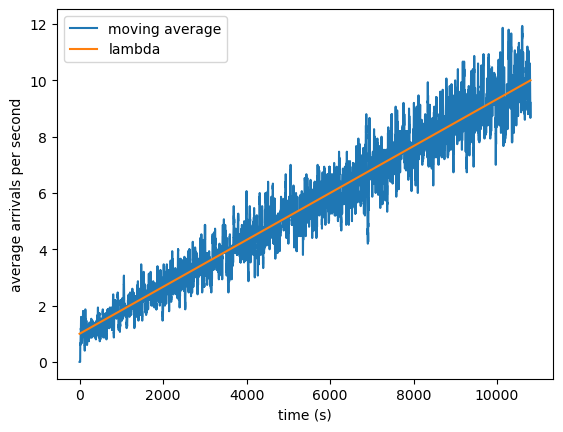

In [5]:
lam = np.linspace(1,10,num=10800)
t   = 1
mu  = lam*t

x   = stats.poisson(mu).rvs(10800)

# 15 second moving average
t    = np.arange(10800)
x_ma = np.zeros_like(x,dtype=np.float64)
for i in range(15,10800):
    x_ma[i] = x[i-15:i].mean()

    
plt.plot(t,x_ma , label='moving average')
plt.plot(t,lam  , label='lambda')
plt.legend()
plt.xlabel('time (s)')
plt.ylabel('average arrivals per second')
plt.show()
    